In [109]:
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt


Set start and end time. It is one year by default

In [110]:
end = datetime.date.today()
start = end - datetime.timedelta(365)


function to calculate MA and EMA

In [111]:
def caculateEMA(prices, days, smoothing=2):
    ema = [sum(prices[:days]) / days]
    for price in prices[days:]:
        ema.append((price * (smoothing / (1 + days))) +
                   ema[-1] * (1 - (smoothing / (1 + days))))
    return [None]*(days-1)+ema


def caculateMA(prices, days):
    return prices.rolling(days).mean()



def addMAData(prices_df):
    prices_df['MA20'] = caculateMA(prices_df['Close'], 20)
    prices_df['MA60'] = caculateMA(prices_df['Close'], 60)
    prices_df['MA120'] = caculateMA(prices_df['Close'], 120)
    prices_df['EMA20'] = caculateEMA(prices_df['Close'], 20)
    prices_df['EMA60'] = caculateEMA(prices_df['Close'], 60)
    prices_df['EMA120'] = caculateEMA(prices_df['Close'], 120)

def caculateOneDayPriceScore(prices):
    score = 0
    fullScore = 120
    priceToday = prices.iloc[-1]
    price20 = prices.iloc[-20]
    price60 = prices.iloc[-60]
    price120 = prices.iloc[0]
    if priceToday['Close'] >= priceToday['EMA120']:
        score += 30
    if priceToday['Close'] >= priceToday['EMA60']:
        score += 20
    if priceToday['Close'] >= priceToday['EMA20']:
        score += 10
    if priceToday['Close'] >= price20['Close']:
        score += 30
    if priceToday['Close'] >= price60['Close']:
        score += 20
    if priceToday['Close'] >= price120['Close']:
        score += 10
    return score*100/fullScore


def caculateOneDayMAScore(oneDayPrices):
    score = 0
    fullScore = 120
    if oneDayPrices['EMA20'] > oneDayPrices['EMA120']:
        score += 30
    if oneDayPrices['MA20'] > oneDayPrices['MA120']:
        score += 30
    if oneDayPrices['EMA20'] > oneDayPrices['EMA60']:
        score += 20
    if oneDayPrices['MA20'] > oneDayPrices['MA60']:
        score += 20
    if oneDayPrices['EMA60'] > oneDayPrices['EMA120']:
        score += 10
    if oneDayPrices['MA60'] > oneDayPrices['MA120']:
        score += 10
    return score*100/fullScore


def addMAScore(pricesDF):
    score = [None] * 119
    for i in range(119, len(pricesDF)):
        score.append(caculateOneDayMAScore(pricesDF.iloc[i,:]))
    pricesDF['MAScore'] = score


def addPriceScore(pricesDF):
    score = [None]*119
    for i in range(120, len(pricesDF)+1):
        score.append(caculateOneDayPriceScore(pricesDF.iloc[i-120:i, :]))

    pricesDF['PriceScore'] = score





Plot stock data

In [112]:


def plotStock(prices_df):
    prices_df['Close'].plot(figsize=(15, 7), label='Close', c='black')
    prices_df['MA20'].plot(label='MA20', c='red', linestyle='dashed')
    prices_df['EMA20'].plot(label='EMA20', c='red')
    prices_df['MA60'].plot(label='MA60', c='orange', linestyle='dashed')
    prices_df['EMA60'].plot(label='EMA60', c='orange')
    prices_df['MA120'].plot(label='MA120', c='blue', linestyle='dashed')
    prices_df['EMA120'].plot(label='EMA120', c='blue')
    prices_df['MAScore'].plot(label='MAScore', c='green')
    prices_df['PriceScore'].plot(label='PriceScore', c='yellow')
    plt.legend()


In [113]:
def getStockData(name):
    stock = web.DataReader(name, 'yahoo', start, end)
    addMAData(stock)
    addMAScore(stock)
    addPriceScore(stock)
    plotStock(stock)
    return stock
    


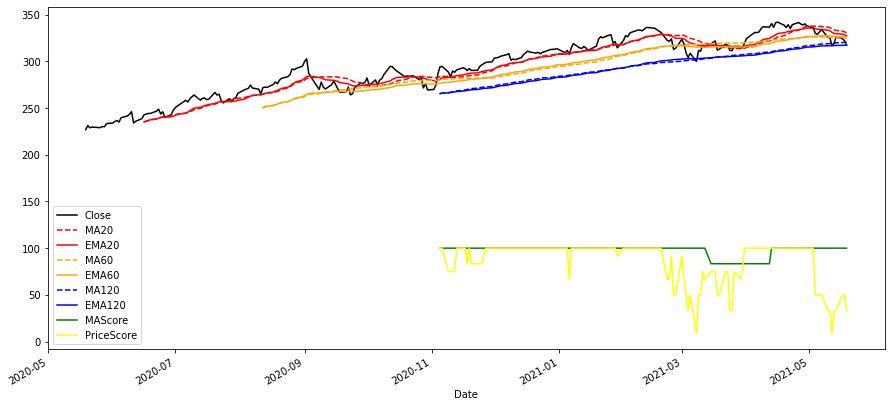

In [114]:

google=getStockData('QQQ')


In [115]:
google.iloc[118,:]

High          2.887700e+02
Low           2.818700e+02
Open          2.835900e+02
Close         2.869100e+02
Volume        7.572820e+07
Adj Close     2.860296e+02
MA20          2.830120e+02
MA60          2.800340e+02
MA120                  NaN
EMA20         2.796958e+02
EMA60         2.759685e+02
EMA120                 NaN
MAScore                NaN
PriceScore             NaN
Name: 2020-11-04 00:00:00, dtype: float64